# 1) Importing the packages and libraries

In [12]:
# https://www.kaggle.com/thilakshasilva/predicting-titanic-survival-using-five-algorithms  -- using R code
# https://www.kaggle.com/rounak15/titanic-survival-prediction-with-python   -- using Python code
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
#import sklearn
#from pandas import Series, DataFrame
from pylab import rcParams
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
#from sklearn.metrics import classification_report


# 2) Reading and exploring the data

In [103]:
titanic = pd.read_csv("https://raw.githubusercontent.com/BigDataGal/Python-for-Data-Science/master/titanic-train.csv")
titanic.shape

(891, 12)

In [104]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [105]:
titanic.info()
# Categorical : Pclass, Sex, Survived, Embarked
# Continuous : Age, Fare, Sibsp, Parch, PassengerId
# Alphanumeric: Ticket, Cabin, Name

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


# 3) Data analysis :

In [106]:
#printing out a list of all the columns in our training dataset
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Types of features :

Categorical : Pclass, Sex, Embarked, Survived

Continuous : Age, Fare, Sibsp, Parch, PassengerId

lphanumeric: Ticket, Cabin, Name

In [107]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


There are a total of 891 passengers in our training dataset.
1) Since the Survived column has dicrete data, the mean gives us the number of people survived from 891 i.e. 38%. 
2) Most people belonged to Pclass = 3
3) The maximum Fare paid for a ticket was 512 however the fare prices varied a lot as we can see from 
   the standard deviation of 49

In [108]:
titanic.describe(include='O')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Anderson, Mr. Harry",male,1601,B96 B98,S
freq,1,577,7,4,644


Taking a look at our categorical features we find that:

1) The passneger column has two sexes with male being the most common.
2) Cabin feature has many duplicate values.
3) Embarked has three possible values with most passengers embarking from Southhampton.
4) Names of all passengers are unique.
5) Ticket column also has a fair amount of duplicate values.

In [109]:
#Finding the percantage of missing values in train dataset
titanic.isnull().sum()/ len(titanic) *100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

1) Age has 20% null values.
2) Cabin has 77% null values (very high %)
3) Embarked has 0.22% null values (very low %)
conclusion : As we can see the Age column and Embarked column are missing values that we will need to fill. The Cabin coulmn has 77% missing values in train  dataset hence, it might be worth considering dropping that feature.

# 4) Visual Data Analysis

Sex feature

male      577
female    314
Name: Sex, dtype: int64

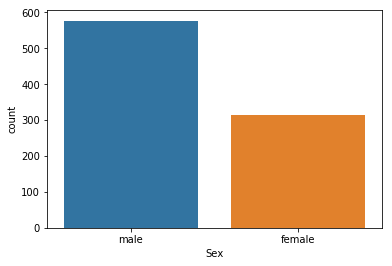

In [28]:
import seaborn as sns
sns.countplot('Sex',data=titanic)
titanic['Sex'].value_counts()

The number of males on board were clearly more than the female.

,Sex,Survived
0,female,0.742038
1,male,0.188908


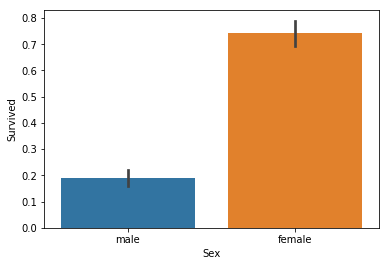

In [32]:
#Comparing the Sex feature against Survived
sns.barplot(x='Sex',y='Survived',data=titanic)
titanic.groupby('Sex', as_index=False).Survived.mean()

 the number of female who survived was much more than the males who survived i.e. 74% females as against to 18% males

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


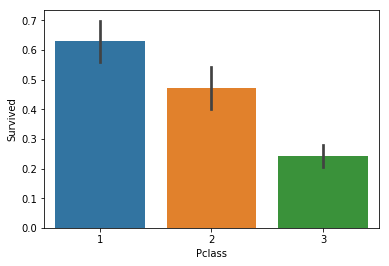

In [33]:
#Comparing the Pclass feature against Survived
sns.barplot(x='Pclass',y='Survived',data=titanic)
titanic[["Pclass", "Survived"]].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

Class had an effect on survival of each passenger with the percentages of survival being 62.96%, 47.28%, 24.23% for Pclass 1, 2 and 3 respectively. Thus, belonging to Pclass = 1 had a huge advantage.

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


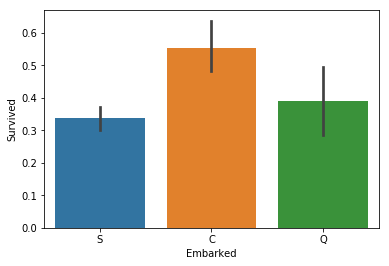

In [34]:
#Comparing the Embarked feature against Survived
sns.barplot(x='Embarked',y='Survived',data=titanic)
titanic[["Embarked", "Survived"]].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

It seems that the passengers that embarked from port Cherbourg had a higher rate of Survival at 55%. This could be either due to their Sex or socio-economic class. 

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


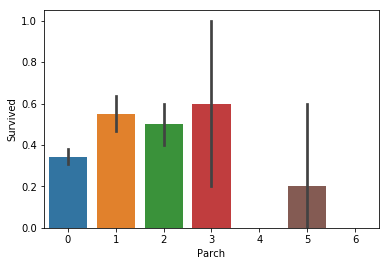

In [35]:
sns.barplot(x='Parch',y='Survived',data=titanic)
titanic[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

Looks like passengers who had either 1, 2 or 3 had a higher possibility of surviving than the ones had none. However having more than 3 made the possibility even lesser. 

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


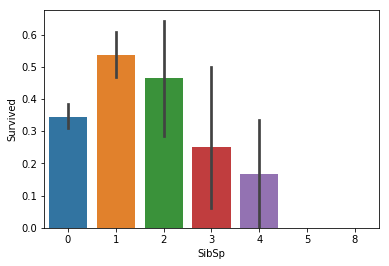

In [36]:
sns.barplot(x='SibSp',y='Survived',data=titanic)
titanic[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

It seems that having a spouse or 1 sibling had a positive effect on Survival as compared to being alone. Though the chances of survival go down with the number of siblings after 1.

The Age column has some missing values. We will take care of that later when we clean our training data. First we shall proceed by:

1) Plotting a histogram of the age values .
2) Taking a look at the median value of age as well as the spread.

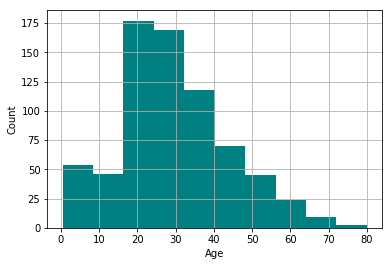

The Mean age of passengers is : 29
The Median age of passengers is : 28
The Standard Deviation age of passengers is : 14


In [38]:
titanic.Age.hist(bins=10,color='teal')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()
print("The Mean age of passengers is :", int(titanic.Age.mean()))
print("The Median age of passengers is :", int(titanic.Age.median()))
print("The Standard Deviation age of passengers is :", int(titanic.Age.std()))

In [52]:
from scipy.stats import kurtosis, skew
# check for skewness
print( 'excess kurtosis of normal distribution (should be 0): {}'.format( kurtosis(titanic['Age']) ))
print( 'skewness of normal distribution (should be 0): {}'.format( skew(titanic['Age']) ))

excess kurtosis of normal distribution (should be 0): nan
skewness of normal distribution (should be 0): nan


In [55]:
titanic.Age.skew(axis = 0, skipna = True) 

0.38910778230082704

In [56]:
titanic.Age.kurtosis(axis = 0, skipna = True) 

0.17827415364210353

It is obvious to assume that younger individuals were more likely to survive, however we should test our assumption before we proceed.

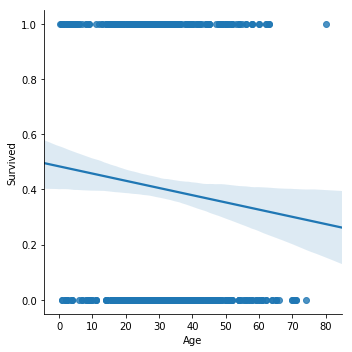

In [40]:
sns.lmplot(x='Age',y='Survived',data=titanic,palette='Set1')

Our assumption was right, younger individuals were more likely to survive.

From the sex column we saw that there was a significant difference in the percentage of men and women that survived. Does sex also play a role when it comes to surviving the disaster along with the age?

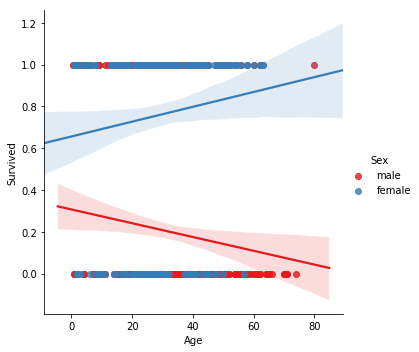

In [42]:
sns.lmplot(x='Age',y='Survived',data=titanic,hue='Sex',palette='Set1')

Interestingly, age has an opposite effect on the survival in men and women. The chances of survival increase as the age of women increases.

Takeaway: Age feature can have a different effect on the outcome depending on the sex of the passenger. Perhaps we can use this information in feature engineering

,Sex,Age
0,female,27.0
1,male,29.0


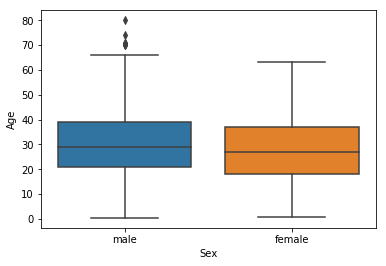

In [43]:
#Checking for outliers in Age data
sns.boxplot(x='Sex',y='Age',data=titanic)

#getting the median age according to Sex
titanic.groupby('Sex',as_index=False)['Age'].median()

#plotting the Fare column to see the spread of data
sns.boxplot("Fare",data=titanic)

#Checking the mean and median values
print("Mean value of Fare is :",titanic.Fare.mean())
print("Median value of Fare is :",titanic.Fare.median())

# 5)Cleaning Data *

In [110]:
#let's start off by dropping the coulmns we will not be needing
drop_list=['Cabin','Ticket','PassengerId']

titanic = titanic.drop(drop_list,axis=1)

Now, let's fill in the missing values for Embarked column in the training dataset. Most people embarked on their journey from Southhampton port. Hence, we will be filling the two missing values with "S"

In [111]:
#filling the missing Embarked values in train and test datasets
titanic.Embarked.fillna('S',inplace=True)

We will replace the NaN values in the age column with the median age

In [112]:
#filling the missing values in the Age column. histogram has right skewed
titanic.Age.fillna(int(titanic.Age.median()), inplace=True)

There is a small fraction of fare values missing in the fare column which we will fill using the median value since there a plenty of outliers in the data.

# 6) Feature Engineering

Title Feature The name column might not be useful to us directly but a lot of names have titles like Mr, Mrs, Lady, etc which might indicate the individual's status in the society which can affect the chance of survival.

We shall try to extract a Title feature form the name column which might improve the performanc of our model.

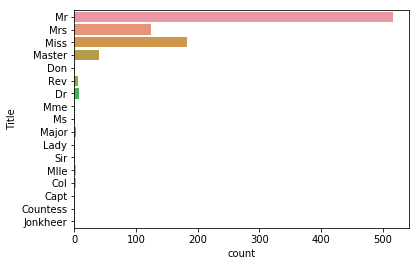

In [113]:
#extracting the various title in Names column
Combined_data = [titanic]
for dataset in Combined_data:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
    
#Plotting the various titles extracted from the names    
sns.countplot(y='Title',data=titanic)  

There are some titles that are very rare like Capt and Lady. It would be better to group such titles under one name know as 'rare'. Some titles also seem to be incorrectly spelled. They also need to be rectified.

In [114]:
#Refining the title feature by merging some titles
for dataset in Combined_data:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Special')

    dataset['Title'] = dataset['Title'].replace({'Mlle':'Miss','Ms':'Miss','Mme':'Mrs'})
    
titanic.groupby('Title',as_index=False)['Survived'].mean().sort_values(by='Survived',ascending=False)

,Title,Survived
3,Mrs,0.793651
1,Miss,0.702703
0,Master,0.575000
4,Special,0.347826
2,Mr,0.156673


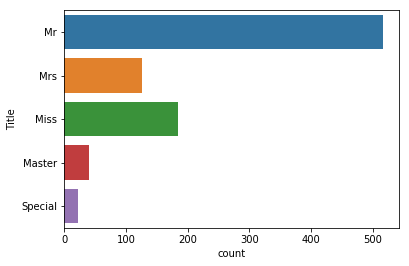

In [115]:
#Now lets see the distribution of the title feature
sns.countplot(y='Title',data=titanic)

In [116]:
#Mapping the title names to numeric values
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Special": 5}
for dataset in Combined_data:
    dataset['Title'] = dataset.Title.map(title_mapping)
    dataset['Title'] = dataset.Title.fillna(0)

As we observed from our data visualization being alone on the titanic had a disadvantage when it came to survival: Next we will create a feature IsAlone which depends on the number of family members that can be calculated from the Parch and SibSp columns

In [117]:
#Creating a new feature IsAlone from the SibSp and Parch columns
for dataset in Combined_data:
    dataset["Family"] = dataset['SibSp'] + dataset['Parch']
    dataset["IsAlone"] = np.where(dataset["Family"] > 0, 0,1)
    dataset.drop('Family',axis=1,inplace=True)
titanic.head()   

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title,IsAlone
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3,0
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3,0
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1,1


Getting rid of the columns that are not required anymore:

In [118]:
#dropping the Name,SibSP and Parch columns
for dataset in Combined_data:
    dataset.drop(['SibSp','Parch','Name'],axis=1,inplace=True)  

Age had big role to play when it came to survival. Clearly younger people were more likely to survive. Hence, it should be worth considering a feature IsMinor for the passengers under the age of 15.

In [119]:
#Creating another feature if the passenger is a child
for dataset in Combined_data:
    dataset["IsMinor"] = np.where(dataset["Age"] < 15, 1, 0)

Older female passengers also had a higher chance of survival. Let's create a feature name Old_female that would account for women older tha 50 years on board

In [120]:
titanic['Old_Female'] = (titanic['Age']>50)&(titanic['Sex']=='female')
titanic['Old_Female'] = titanic['Old_Female'].astype(int)

Pclass, Sex and Embarked are the categorical features in our data. we can convert these categorucal variables into dummy variables using the get_dummies method in python

In [121]:
#Converting categorical variables into numerical ones
titanic_df2 = pd.get_dummies(titanic,columns=['Pclass','Sex','Embarked'],drop_first=True)

In [122]:
titanic_df2.head()

,Survived,Age,Fare,Title,IsAlone,IsMinor,Old_Female,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,0,22.0,7.2500,1,0,0,0,0,1,1,0,1
1,1,38.0,71.2833,3,0,0,0,0,0,0,0,0
2,1,26.0,7.9250,2,1,0,0,0,1,0,0,1
3,1,35.0,53.1000,3,0,0,0,0,0,0,0,1
4,0,35.0,8.0500,1,1,0,0,0,1,1,0,1


Age and Fare columns have continuous data and there might be fluctuations that do not reflect patterns in the data, which might be noise. That's why wel put people that are within a certain range of age or fare in the same bin. This can be achieved using qcut method in pandas

In [123]:
#creating Age bands
titanic_df2['AgeBands'] = pd.qcut(titanic_df2.Age,4,labels=False) 

In [124]:
#creating Fare bands
titanic_df2['FareBand'] = pd.qcut(titanic_df2.Fare,7,labels=False)

In [125]:
#Dropping the Age and Fare columns
titanic_df2.drop(['Age','Fare'],axis=1,inplace=True)

Let's take a final look at our training and testing data before we proceed to build our model.

In [126]:
titanic_df2.head()
#sns.barplot('AgeBands','Survived',data=train_df2)

,Survived,Title,IsAlone,IsMinor,Old_Female,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,AgeBands,FareBand
0,0,1,0,0,0,0,1,1,0,1,0,0
1,1,3,0,0,0,0,0,0,0,0,3,6
2,1,2,1,0,0,0,1,0,0,1,1,1
3,1,3,0,0,0,0,0,0,0,1,2,5
4,0,1,1,0,0,0,1,1,0,1,2,1


# 7) Machine Learning

We will try out some different ML models to see which gives us the best result. the process will be as follows:

Importing the required machine learning libraries from scikit learn.

Splitting out training data into train and test datasets to check the performance of our model.

Try out different classifying model to see which fits the best.

In [127]:
#importing the required ML libraries
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score

In [128]:
#Splitting out training data into X: features and y: target
X = titanic_df2.drop("Survived",axis=1) 
y = titanic_df2["Survived"]

In [129]:
#splitting our training data again in train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)

In [130]:
#Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_test)
acc_logreg = round(accuracy_score(y_pred, y_test) * 100, 2)
acc_logreg

C:\Users\Sanjana\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


79.85

Our score also depends on how we had split our training data using train_test_split. We should also perform k-fold cross validation to get a more accurate score. Here we will be going with 10 folds.

In [131]:
print(metrics.confusion_matrix(y_test, y_pred))

[[133  24]
 [ 30  81]]


In [132]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.85      0.83       157
           1       0.77      0.73      0.75       111

   micro avg       0.80      0.80      0.80       268
   macro avg       0.79      0.79      0.79       268
weighted avg       0.80      0.80      0.80       268



In [133]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, classification_report, confusion_matrix
print(precision_score(y_test, y_pred) )
print(recall_score(y_test, y_pred) )
print(f1_score(y_test, y_pred) )
print(accuracy_score(y_test, y_pred) )

0.7714285714285715
0.7297297297297297
0.75
0.7985074626865671


In [134]:
#let's perform some K-fold cross validation for logistic Regression
cv_scores = cross_val_score(logreg,X,y,cv=10)
 
np.mean(cv_scores)*100

C:\Users\Sanjana\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Sanjana\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Sanjana\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Sanjana\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Sanjana\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to

80.91581545795027

In [99]:
#Decision Tree Classifier

decisiontree = DecisionTreeClassifier()
dep = np.arange(1,10)
param_grid = {'max_depth' : dep}

clf_cv = GridSearchCV(decisiontree, param_grid=param_grid, cv=5)

clf_cv.fit(X, y)
clf_cv.best_params_,clf_cv.best_score_*100
print('Best value of max_depth:',clf_cv.best_params_)
print('Best score:',clf_cv.best_score_*100)

Best value of max_depth: {'max_depth': 4}
Best score: 82.37934904601572


In [101]:
#Random Forest CLassifier

random_forest = RandomForestClassifier()
ne = np.arange(1,20)
param_grid = {'n_estimators' : ne}

rf_cv = GridSearchCV(random_forest, param_grid=param_grid, cv=5)

rf_cv.fit(X, y)
print('Best value of n_estimators:',rf_cv.best_params_)
print('Best score:',rf_cv.best_score_*100)

Best value of n_estimators: {'n_estimators': 18}
Best score: 80.02244668911335


In [102]:
gbk = GradientBoostingClassifier()
ne = np.arange(1,20)
dep = np.arange(1,10)
param_grid = {'n_estimators' : ne,'max_depth' : dep}

gbk_cv = GridSearchCV(gbk, param_grid=param_grid, cv=5)

gbk_cv.fit(X, y)
print('Best value of parameters:',gbk_cv.best_params_)
print('Best score:',gbk_cv.best_score_*100)

Best value of parameters: {'max_depth': 3, 'n_estimators': 16}
Best score: 82.26711560044893


C:\Users\Sanjana\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


7) Submission. Finally, we are ready to submit our solution to see where we rank. To do so we need to make a submission.csv file that contains only the PassengerId and our predictions for those ID's.

In [ ]:
y_final = clf_cv.predict(test_df2)

submission = pd.DataFrame({
        "PassengerId": test_passenger_df["PassengerId"],
        "Survived": y_final
    })
submission.head()
submission.to_csv('titanic.csv', index=False)